In [63]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')


# Exploratory Data Analysis (EDA)


<img src="img/eda.png" width="500" align="center" />

Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis that employs a variety of techniques (mostly graphical) to

- maximize insight into a data set;
- uncover underlying structure;
- extract important variables;
- detect outliers and anomalies;
- test underlying assumptions;
- develop parsimonious models; and󠀢
- determine optimal factor settings.


<a href="https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm">󠀢󠀢󠀢󠀢📖 NIST</a>

### Interactive links:

- <a href="https://seeing-theory.brown.edu/index.html">Seeing Theory</a>
- <a href="http://mfviz.com/central-limit/">Central Limit Theorem</a>


## Some statistical jargon:

### Expected value / Mean

The **mean**, also referred to by statisticians as the average, is the most common statistic used to measure the center of a numerical data set. The mean is the sum of all the values in the data set divided by the number of values in the data set. The mean of the entire population is called the population mean, and the mean of a sample is called the sample mean.

<font color='red'>The average is easily influenced by outliers (very small or large values in the data set that are not typical)<font/>

$$ \mu = \Large \bar{x} = \frac{1}{n} \sum_{i=1}^{n}x_i $$

In [154]:
lst = [1, 4, 3, 2, 6, 4, 4, 3, 2, 6]

In [ ]:
def mean(t):
    return sum(t) / len(t)

In [ ]:
mean(lst)

In [ ]:
np.mean(lst)

### Median

The **median** represents the middle value in a dataset. The median is important because it gives us an idea of where the center value is located in a dataset. The median tends to be more useful to calculate than the mean when a distribution is skewed and/or has outliers

<img src="img/med.svg" width="250" align="center" />

In [146]:
def median(X):
    n = len(X)
    sortX = sorted(X)
    
    if n % 2 != 0:
        return sortX[n // 2]
    else:
        return ( sortX[n // 2 - 1] + sortX[n // 2] ) / 2


In [155]:
median(lst)

4

In [156]:
# lst1 = [0, 1, -1, -10, -16, -6]
np.median(lst)
# np.percentile(lst, 50)

4.0

### Variance

In statistics, scientists and statisticians use the **variance** to determine how well the mean represents an entire set of data. For instance, the higher the variance, the more range exists within the set

https://en.wikipedia.org/wiki/Bessel%27s_correction

$$ \Large s^2 = \frac{1}{n} \sum_{i=1}^{n}(x_i - \bar{x})^2 $$

In [67]:
def variance(t):
    mu = mean(t)
    return sum((x - mu) ** 2 for x in t) / len(t)

In [68]:
variance(lst)

2.45

In [66]:
np.var(lst)

2.45

### Standard Deviation

A **standard deviation** (or σ) is a measure of how dispersed the data is in relation to the mean. Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out.

$$ \Large s = \sqrt{\frac{1}{n} \sum_{i=1}^{n}(x_i - \bar{x})^2} $$

<img src="img/std.jfif" width="500" align="center" />

In [71]:
def std(t):
    return variance(t) ** 0.5

In [72]:
std(lst)

1.5652475842498528

In [73]:
np.std(lst)

1.5652475842498528

### Mode

In [176]:
from scipy import stats

stats.mode(lst).mode

array([4])

## Preparations

<img src="img/ml.jpg" width="600"/>

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [158]:
plt.style.use('bmh')

In [159]:
df = pd.read_csv('data/Iris.csv')

In [160]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [161]:
df.tail(1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [162]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [163]:
df.columns = df.columns.str.lower()

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             150 non-null    int64  
 1   sepallengthcm  150 non-null    float64
 2   sepalwidthcm   150 non-null    float64
 3   petallengthcm  150 non-null    float64
 4   petalwidthcm   150 non-null    float64
 5   species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [165]:
missing_data = pd.DataFrame({
    'total_missing': df.isnull().sum(),
    'perc_missing': (df.isnull().sum()/df.shape[0]) * 100
})

missing_data.sort_values(by='perc_missing', ascending=False)

,total_missing,perc_missing
id,0,0.0
sepallengthcm,0,0.0
sepalwidthcm,0,0.0
petallengthcm,0,0.0
petalwidthcm,0,0.0
species,0,0.0


In [166]:
df.describe()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Data Visualization

In [167]:
import seaborn as sns

In [168]:
num_columns = df.select_dtypes(include=np.number).columns
num_columns

Index(['id', 'sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm'], dtype='object')

In [171]:
col = df[num_columns[3]]

<AxesSubplot:xlabel='petallengthcm', ylabel='Density'>

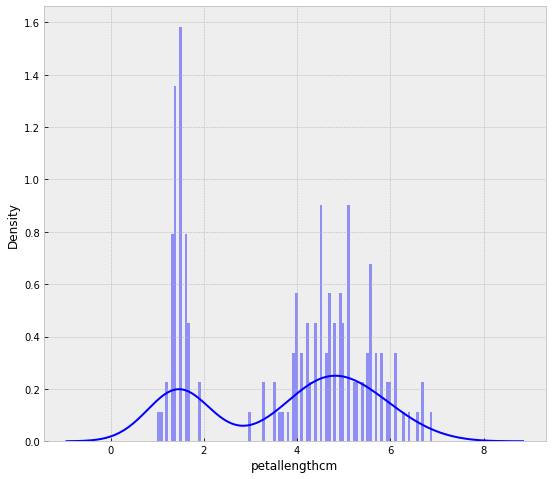

In [172]:
plt.figure(figsize=(9, 8))

sns.distplot(col,
             color='b',
             bins=100,
             hist_kws={'alpha': 0.4})

### Skewness and Kurtosis

#### Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point

#### Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. It refers to the degree of presence of outliers in the distribution.

<img src="img/skew.gif" width="500" align="center" />

<table><tr>
<td> <img src="img/skew.jfif" style="width: 250px;"/> </td>
<td> <img src="img/kurt.png" style="width: 250px;"/> </td>
</tr></table>


In [173]:
print("Skewness: %f" % col.skew())
print("Kurtosis: %f" % col.kurt())

Skewness: -0.274464
Kurtosis: -1.401921


## Handling outliers

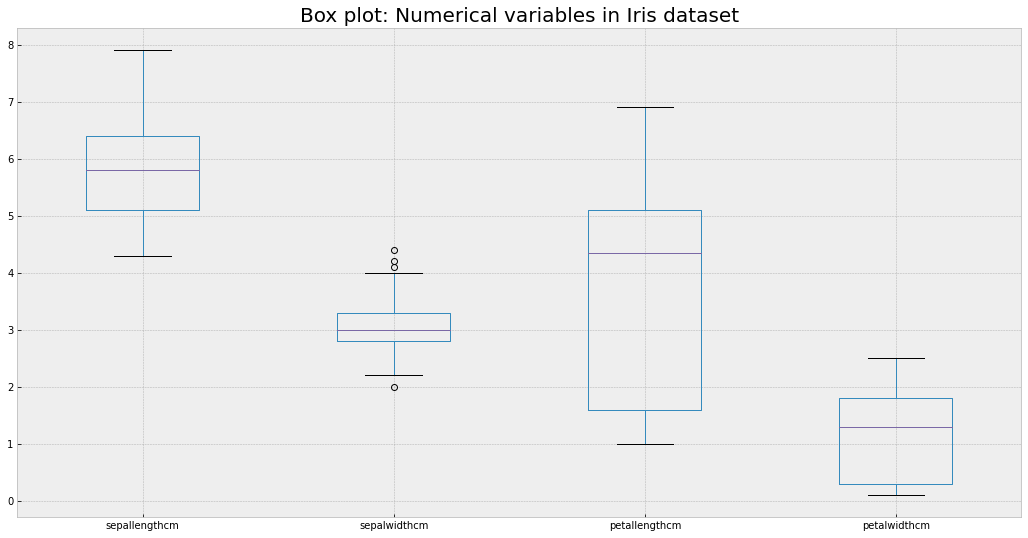

In [175]:
plt.figure(figsize=(18, 9))

df[['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm']].boxplot()

plt.title("Box plot: Numerical variables in Iris dataset", fontsize=20)
plt.show()

In [181]:
def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Species vs {} {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Species', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)
    
def norm_counts(t):
    norms = np.linalg.norm(t.fillna(0), axis=1)
    t_norm = t[0:0]
    for row, euc in zip(t.iterrows(), norms):
        t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
    return t_norm


In [185]:
cat_fit.unstack()

petallengthcm  species        
1.0            Iris-setosa        1.0
               Iris-versicolor    NaN
               Iris-virginica     NaN
1.1            Iris-setosa        1.0
               Iris-versicolor    NaN
                                 ... 
6.7            Iris-versicolor    NaN
               Iris-virginica     2.0
6.9            Iris-setosa        NaN
               Iris-versicolor    NaN
               Iris-virginica     1.0
Length: 129, dtype: float64

In [183]:
g_by_category = df.groupby('species')

col = 'petallengthcm'

cat_fit = g_by_category[col].value_counts()
cat_fit = cat_fit.unstack()
cat_fit_norm = norm_counts(cat_fit)
cat_fit_norm.drop([col], axis=1, inplace=True)
plot_barh(cat_fit, col)


KeyError: "['petallengthcm'] not found in axis"

In [ ]:
plt.figure(figsize=(18,8))
plt.xlabel("", fontsize=18)
plt.ylabel("size", fontsize=18)
plt.suptitle("Joint distribution of  vs ", fontsize= 20)
plt.plot(mc_df., mc_df['size'], 'bo', alpha=0.2)
plt.show()


#### Resources used for creating this notebook:

- https://github.com/learn-co-students/dsc-implementing-statistics-with-functions-lab-dc-ds-071519/blob/master/index.ipynb
- https://archive.ics.uci.edu/ml/datasets/iris
- https://www.kaggle.com/agrawaladitya/step-by-step-data-preprocessing-eda
- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
- https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python
- https://www.kaggle.com/mjamilmoughal/eda-of-titanic-dataset-with-python-analysis